In [24]:
import numpy as np
import pandas as pd
df1=pd.read_csv('/content/links.csv')
df2=pd.read_csv('/content/movies.csv')
df3=pd.read_csv('/content/ratings.csv')
df4=pd.read_csv('/content/tags.csv')

In [25]:
df=pd.merge(df2,df1,on='movieId',how='left')
df.to_csv('movies.csv')
!ls -l *.csv | wc -l


4


In [26]:
df = pd.read_csv('movies.csv')
df.shape


(9742, 6)

In [27]:
df3.shape


(100836, 4)

In [28]:
len(df3['userId'].unique())


610

In [29]:
len(df3['userId'].unique())


610

In [31]:
df3.groupby('movieId')['rating'].count().sort_values(ascending=False).head(1)


,rating
movieId,
356,329


In [33]:
# prompt: Select all the correct tags submitted by users to "Matrix, The (1999)" movie using tags and movies.csv

df = pd.merge(df4,df2,on='movieId',how='left')
df[df['title']=='Matrix, The (1999)']['tag'].unique()


array(['martial arts', 'sci-fi', 'alternate universe', 'philosophy',
       'post apocalyptic'], dtype=object)

In [34]:
# prompt: What is the average user rating for movie named "Terminator 2: Judgment Day (1991)" using movies.csv

df = pd.merge(df3,df2,on='movieId',how='left')
df[df['title']=='Terminator 2: Judgment Day (1991)']['rating'].mean()


3.970982142857143

<Axes: >

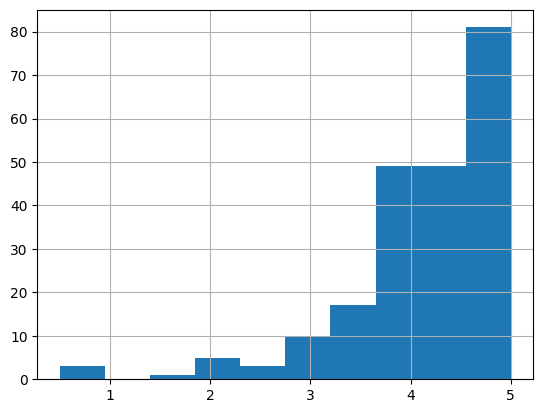

In [35]:
# prompt: How does the data distribution of user ratings for "Fight Club (1999)" movie looks like using the ratings.csv

df = pd.merge(df3,df2,on='movieId',how='left')
df[df['title']=='Fight Club (1999)']['rating'].hist()


In [36]:
# prompt: Which movie is the most popular based on  average user ratings using ratings.csv

df = pd.read_csv('ratings.csv')
df.groupby('movieId')['rating'].mean().sort_values(ascending=False).head(1)


,rating
movieId,
88448,5.0


In [37]:
# prompt: Select all the correct options which comes under top 5 popular movies based on number of user ratings using movies and ratings.csv

df = pd.merge(df3,df2,on='movieId',how='left')
df.groupby('title')['rating'].count().sort_values(ascending=False).head(5)


,rating
title,
Forrest Gump (1994),329
"Shawshank Redemption, The (1994)",317
Pulp Fiction (1994),307
"Silence of the Lambs, The (1991)",279
"Matrix, The (1999)",278


In [38]:
# prompt: Which Sci-Fi movie is "third most popular" based on the number of user ratings using ratings.csv

df = pd.merge(df3,df2,on='movieId',how='left')
df[df['genres'].str.contains('Sci-Fi')].groupby('title')['rating'].count().sort_values(ascending=False).head(3)


,rating
title,
"Matrix, The (1999)",278
Star Wars: Episode IV - A New Hope (1977),251
Jurassic Park (1993),238


In [39]:
df = pd.read_csv('links.csv')
df[df['imdbId']==df['imdbId'].max()]['movieId']


,movieId
9740,193587


In [41]:
df = pd.merge(df3,df2,on='movieId',how='left')
df_scifi = df[df['genres'].str.contains('Sci-Fi')]
df_scifi.groupby('movieId')['rating'].mean().sort_values(ascending=False).head(1)


,rating
movieId,
94810,5.0
